In [4]:
pip install numpy


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [7]:

pip install nltk


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [8]:

pip install nltk


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install scikit-learn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [11]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [12]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
# printing the stopwords in English
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [14]:
# loading the dataset to a pandas DataFrame
news_dataset = pd.read_csv('train.csv')

In [15]:
news_dataset.shape


(20800, 5)

In [16]:
news_dataset.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


C:\Users\hp\AppData\Local\Temp\ipykernel_2160\1529447720.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data = news_dataset, palette = 'mako',saturation = 1)


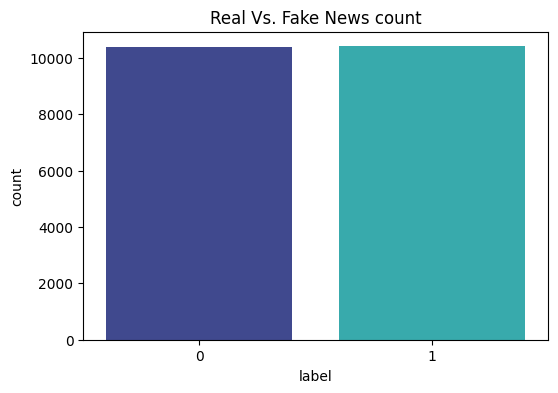

In [17]:
plt.figure(figsize = (6,4))
sns.countplot(x='label', data = news_dataset, palette = 'mako',saturation = 1)
plt.title("Real Vs. Fake News count", fontsize = 12)
plt.show()

In [18]:
# counting the number of missing values in the dataset
news_dataset.isnull().sum()


id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [19]:
# replacing the null values with empty string
news_dataset = news_dataset.fillna('')


In [20]:
# merging the author name and news title
news_dataset['content'] = news_dataset['author']+' '+news_dataset['title']
print(news_dataset['content'])

0        Darrell Lucus House Dem Aide: We Didn’t Even S...
1        Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...
2        Consortiumnews.com Why the Truth Might Get You...
3        Jessica Purkiss 15 Civilians Killed In Single ...
4        Howard Portnoy Iranian woman jailed for fictio...
                               ...                        
20795    Jerome Hudson Rapper T.I.: Trump a ’Poster Chi...
20796    Benjamin Hoffman N.F.L. Playoffs: Schedule, Ma...
20797    Michael J. de la Merced and Rachel Abrams Macy...
20798    Alex Ansary NATO, Russia To Hold Parallel Exer...
20799              David Swanson What Keeps the F-35 Alive
Name: content, Length: 20800, dtype: object


In [21]:
# separating the data & label
news_dataset = news_dataset.sample(n=500)
X = news_dataset.drop(columns='label', axis=1)
Y = news_dataset['label']
print(X)
print(Y)

          id                                              title  \
12101  12101                                                      
20054  20054  Single Family Housing Starts Surge Before Long...   
7669    7669                                      AMERICAN EVIL   
20318  20318  Slovenia Adds Water To Constitution As Fundame...   
3446    3446  Breaking: Julian Assange Just Confirmed… Depar...   
...      ...                                                ...   
1215    1215  At Rio Olympics, the National Anthem Sounds … ...   
8706    8706        Obama DOJ: Handmaiden of Clinton Corruption   
20052  20052  RIP - Leonard Cohen Dead at 82       : Informa...   
18574  18574  Franken Calls on Sessions to Come Before the J...   
17782  17782         Turkey and the Next War      : Information   

                              author  \
12101                God and Country   
20054                      Lee Adler   
7669                          shorty   
20318                Lance Schuttle

In [22]:
port_stem = PorterStemmer()


In [23]:
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content


In [24]:
news_dataset['content'] = news_dataset['content'].apply(stemming)
print(news_dataset['content'])

12101                                          god countri
20054    lee adler singl famili hous start surg long wi...
7669                                  shorti american evil
20318    lanc schuttler slovenia add water constitut fu...
3446     break julian assang confirm depart justic told...
                               ...                        
1215     david segal rio olymp nation anthem sound sad ...
8706           edjenn obama doj handmaiden clinton corrupt
20052    informationclearinghous info rip leonard cohen...
18574    pam key franken call session come judiciari co...
17782                philip giraldi turkey next war inform
Name: content, Length: 500, dtype: object


In [25]:
#separating the data and label
X = news_dataset['content'].values
Y = news_dataset['label'].values
print(X)

['god countri'
 'lee adler singl famili hous start surg long winter discont'
 'shorti american evil'
 'lanc schuttler slovenia add water constitut fundament right peopl'
 'break julian assang confirm depart justic told hillari delet evid endingf news network'
 'isabel kershner say hashtag shame ancient hebrew new york time'
 'mcshane alkalin water kill cancer make'
 'daili sheepl daili news brief social justic movement realiz use thank wikieak'
 'west shamelessli whitewash terrorist counterattack aleppo ulson gunnar'
 'liz spayd call rape new york time'
 'mike mcphate california today defi trump sanctuari bill new york time'
 'daisi luther stuff news one talk elect'
 'max fisher russia u elect know know new york time'
 'mac slavo trump prepar mass deport million undocu immigr crimin record go gone'
 'ankara benefit mosul oper citi avoid trap sectarian'
 'deleg india visit kamaz russia india report'
 'charli nash report san francisco consid crackdown uber lyft demand compani data breitb

In [26]:
print(Y)


[1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 0 1 0 0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1
 1 1 1 0 1 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 1 1 1 0 1 1
 0 0 1 0 1 1 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 1 1 0 1 1 1 0 1 1 0 0 0 1 1 1
 0 1 0 0 1 0 0 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 0 1 1 1 1
 1 1 0 0 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 1 0
 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0
 1 0 0 1 1 0 1 0 1 1 0 0 1 1 0 1 0 0 1 1 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 1 1
 0 0 1 0 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 0 0 0 0 1 0 0 1 1 0 1 1 1 1 0
 1 1 1 1 1 1 0 0 1 1 1 0 1 0 0 0 0 1 0 1 1 0 1 1 0 0 0 1 1 1 1 1 0 1 1 0 0
 0 0 0 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 0 1 0 1 0 1 1 1 0 1
 0 0 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 0 0 1 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0
 0 1 1 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1 0 1 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0
 0 0 1 0 1 1 1 0 0 0 1 0 0 1 1 0 1 1 1 0 0 1 1 1 0 1 1 1 0 0 1 1 0 1 1 0 0
 1 1 1 1 0 1 0 1 0 0 0 0 

In [27]:
Y.shape


(500,)

In [28]:
# converting the textual data to numerical data
vectorizer = TfidfVectorizer()
vectorizer.fit(X)

X = vectorizer.transform(X)
print(X)

  (np.int32(0), np.int32(507))	0.7071067811865476
  (np.int32(0), np.int32(911))	0.7071067811865476
  (np.int32(1), np.int32(27))	0.32193797857367046
  (np.int32(1), np.int32(620))	0.3432741585844398
  (np.int32(1), np.int32(782))	0.30679971794172234
  (np.int32(1), np.int32(1027))	0.2641273579201836
  (np.int32(1), np.int32(1257))	0.30679971794172234
  (np.int32(1), np.int32(1304))	0.2950575707535301
  (np.int32(1), np.int32(2028))	0.3432741585844398
  (np.int32(1), np.int32(2105))	0.32193797857367046
  (np.int32(1), np.int32(2168))	0.30679971794172234
  (np.int32(1), np.int32(2438))	0.3432741585844398
  (np.int32(2), np.int32(82))	0.4980833319348814
  (np.int32(2), np.int32(749))	0.632494076703607
  (np.int32(2), np.int32(2012))	0.5931814540117537
  (np.int32(3), np.int32(22))	0.3344638771938044
  (np.int32(3), np.int32(477))	0.3566302010383019
  (np.int32(3), np.int32(872))	0.3566302010383019
  (np.int32(3), np.int32(1234))	0.3344638771938044
  (np.int32(3), np.int32(1641))	0.296570

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state=2)
print(Y_test)

[1 0 1 1 1 1 0 1 0 1 1 1 0 0 1 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0
 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0
 1 1 0 1 0 0 0 0 0 1 1 1 1 1 0 0 0 1 1 0 1 1 1 1 1 1]


In [30]:
decision_tree = DecisionTreeClassifier()

In [31]:
dt=decision_tree.fit(X_train,Y_train)
y_pred = dt.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy Score: {}".format(accuracy))
print('Classification Report:\n', classification_report(Y_test,y_pred,digits=5))

Accuracy Score: 0.92
Classification Report:
               precision    recall  f1-score   support

           0    0.93750   0.90000   0.91837        50
           1    0.90385   0.94000   0.92157        50

    accuracy                        0.92000       100
   macro avg    0.92067   0.92000   0.91997       100
weighted avg    0.92067   0.92000   0.91997       100



Prediction System on Testing Data

In [32]:
X_new = X_test[5]

prediction = dt.predict(X_new)
print(prediction)

if (prediction[0]==0):
  print('The news is Real')
else:
  print('The news is Fake')

[1]
The news is Fake


Manual Testing

In [33]:
def manual_DT_prediction():
    # Taking input of any news in form of text
    X = input("ENTER A NEWS FOR PREDICTION: ")
    # Apply stemming to the input text
    X_new = stemming(X)

    # Vectorize the stemmed textvectorizer.fit(X)
    X = vectorizer.transform([X_new])
    X = X.toarray()
    
    # Make the prediction
    prediction = dt.predict(X)
    if (prediction==0):
     print('The news is Real '+prediction)
    else:
     print('The news is Fake',prediction)

# Example usage
manual_DT_prediction()

The news is Fake [1]


IMPLEMENTING DESCISION TREE ALGORITHM WITHOUT PYTHON PACKAGE


In [38]:
import numpy as np

class DecisionTree:
    def __init__(self, min_samples_split=2, max_depth=100):
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.tree = None

    def fit(self, X, y):
        self.tree = self._grow_tree(X, y)

    def predict(self, X):
        return np.array([self._traverse_tree(x, self.tree) for x in X])

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        n_labels = len(np.unique(y))

        if depth >= self.max_depth or n_labels == 1 or n_samples < self.min_samples_split:
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)

        feat_idxs = np.random.choice(n_features, n_features, replace=False)

        best_feat, best_thresh = self._best_criteria(X, y, feat_idxs)
        left_idxs, right_idxs = self._split(X[:, best_feat], best_thresh)

        left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth + 1)
        right = self._grow_tree(X[right_idxs, :], y[right_idxs], depth + 1)
        return Node(best_feat, best_thresh, left, right)

    def _best_criteria(self, X, y, feat_idxs):
        best_gain = -1
        split_idx, split_thresh = None, None
        for feat_idx in feat_idxs:
            X_column = X[:, feat_idx]
            thresholds = np.unique(X_column)
            for threshold in thresholds:
                gain = self._information_gain(y, X_column, threshold)
                if gain > best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_thresh = threshold
        return split_idx, split_thresh

    def _information_gain(self, y, X_column, split_thresh):
        parent_entropy = self._entropy(y)

        left_idxs, right_idxs = self._split(X_column, split_thresh)

        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0

        n = len(y)
        n_left, n_right = len(left_idxs), len(right_idxs)
        e_left, e_right = self._entropy(y[left_idxs]), self._entropy(y[right_idxs])
        child_entropy = (n_left / n) * e_left + (n_right / n) * e_right

        ig = parent_entropy - child_entropy
        return ig

    def _split(self, X_column, split_thresh):
        left_idxs = np.argwhere(X_column <= split_thresh).flatten()
        right_idxs = np.argwhere(X_column > split_thresh).flatten()
        return left_idxs, right_idxs

    def _entropy(self, y):
        hist = np.bincount(y)
        ps = hist / len(y)
        return -np.sum([p * np.log2(p) for p in ps if p > 0])

    def _most_common_label(self, y):
        return np.bincount(y).argmax()

    def _traverse_tree(self, x, node):
        if node.is_leaf_node():
            return node.value
        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)

class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, *, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

    def is_leaf_node(self):
        return self.value is not None


In [45]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    return accuracy, report
X_1 = news_dataset['content'].values
Y_1 = news_dataset['label'].values
# converting the textual data to numerical data
vectorizer = TfidfVectorizer()
vectorizer.fit(X_1)

X_vec= vectorizer.transform(X_1)
print(X_vec)
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X_vec, Y_1, test_size = 0.2, stratify=Y_1, random_state=2)
print(X_train1,Y_train1)
# Train the Decision Tree model from scratch
DT = DecisionTree(max_depth=5)
DT.fit(X_train1, Y_train1)

# Evaluate the model's performance
accuracy, report = evaluate_model(DT, X_test1, Y_test1)
print("Accuracy:", accuracy)
print("Classification Report:\n", report)


  (np.int32(0), np.int32(507))	0.7071067811865476
  (np.int32(0), np.int32(911))	0.7071067811865476
  (np.int32(1), np.int32(27))	0.32193797857367046
  (np.int32(1), np.int32(620))	0.3432741585844398
  (np.int32(1), np.int32(782))	0.30679971794172234
  (np.int32(1), np.int32(1027))	0.2641273579201836
  (np.int32(1), np.int32(1257))	0.30679971794172234
  (np.int32(1), np.int32(1304))	0.2950575707535301
  (np.int32(1), np.int32(2028))	0.3432741585844398
  (np.int32(1), np.int32(2105))	0.32193797857367046
  (np.int32(1), np.int32(2168))	0.30679971794172234
  (np.int32(1), np.int32(2438))	0.3432741585844398
  (np.int32(2), np.int32(82))	0.4980833319348814
  (np.int32(2), np.int32(749))	0.632494076703607
  (np.int32(2), np.int32(2012))	0.5931814540117537
  (np.int32(3), np.int32(22))	0.3344638771938044
  (np.int32(3), np.int32(477))	0.3566302010383019
  (np.int32(3), np.int32(872))	0.3566302010383019
  (np.int32(3), np.int32(1234))	0.3344638771938044
  (np.int32(3), np.int32(1641))	0.296570

C:\Users\hp\AppData\Local\Temp\ipykernel_2160\3795047838.py:63: SparseEfficiencyWarning: Comparing sparse matrices using >= and <= is inefficient, using <, >, or !=, instead.
  left_idxs = np.argwhere(X_column <= split_thresh).flatten()


ValueError: attempt to get argmax of an empty sequence